<a href="https://colab.research.google.com/github/Musfirah-Ansari/13thDecember2024/blob/main/ML_DAY4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer


# Step 2: Load the dataset
# Assuming you have the dataset in a CSV file named 'heart_disease_data.csv'
df = pd.read_csv('heart_disease_data.csv')

# Step 3: Data Cleaning and Preprocessing
# Check for missing values
print(df.isnull().sum())

# Check basic information about the dataset
print(df.info())

# Handle missing values: Fill missing values or drop rows/columns with missing data (if any)
# For this example, let's assume there are no missing values
# If missing values exist, you could use something like df.fillna(method='ffill') or df.dropna()

# Feature scaling: Standardize the features
scaler = StandardScaler()

# Select features and target variable
X = df.drop('target', axis=1)  # Features
y = df['target']               # Target variable

# Standardizing the features (scaling)
X_scaled = scaler.fit_transform(X)

# Step 4: Exploratory Data Analysis (EDA)
# Display the first few rows of the dataset
print(df.head())

# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Distribution of the target variable (heart disease)
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.show()

# Step 5: Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Build a machine learning model
# Here we will use Logistic Regression, but you can try other models like RandomForest, SVM, etc.
model = LogisticRegression(random_state=42)

# Step 7: Train the model
model.fit(X_train, y_train)

# Step 8: Evaluate the model
# Predict on the test set
y_pred = model.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Step 9: Testing the model (You can test with some new data or by doing cross-validation)
# For now, we are using the hold-out test set
# No further testing is needed unless you have a new dataset

# Step 10: Fine-tuning the model (Optional)
# You can try different models or perform hyperparameter tuning (e.g., GridSearchCV or RandomizedSearchCV)



In [24]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE

In [25]:
# Step 2: Load the dataset
# Assuming you have the dataset in a CSV file named 'heart_disease_data.csv'
df = pd.read_csv('/content/heart_disease_data - heart_disease_data.csv')

In [26]:
# Step 3: Data Cleaning and Preprocessing
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [27]:
# Check basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [28]:
#No Missing Values
# Handle missing values: Fill missing values or drop rows/columns with missing data (if any)
# For this example, let's assume there are no missing values
# If missing values exist, you could use something like df.fillna(method='ffill') or df.dropna()

In [29]:
# Feature scaling: Standardize the features
scaler = StandardScaler()

In [30]:
# Select features and target variable
X = df.drop('target', axis=1)  # Features
y = df['target']               # Target variable

In [31]:
# Standardizing the features (scaling)
X_scaled = scaler.fit_transform(X)

In [32]:
# Step 4: Exploratory Data Analysis (EDA)
# Display the first few rows of the dataset
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


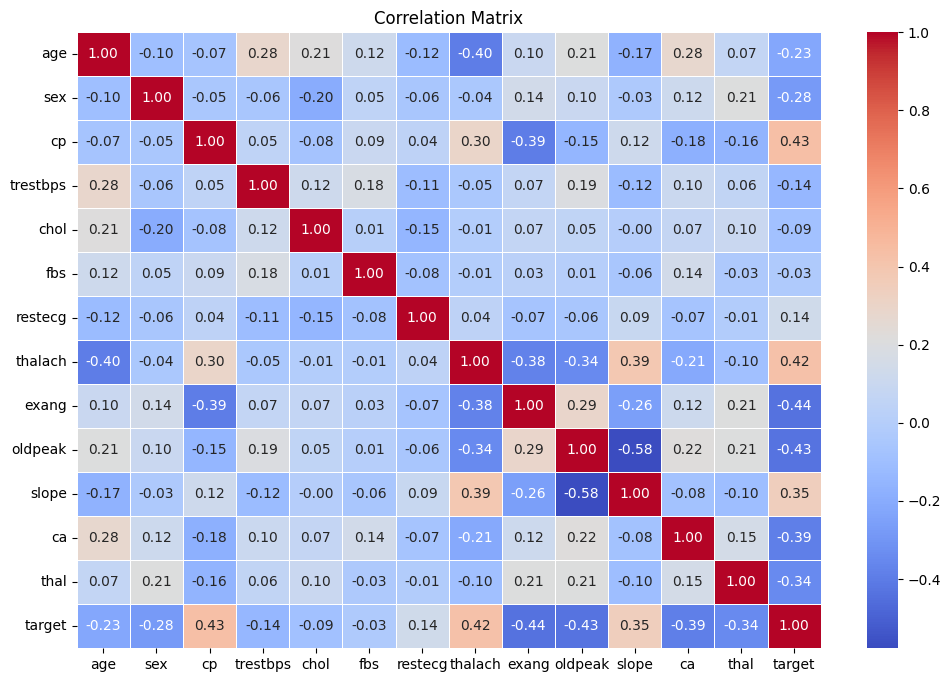

In [33]:
# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

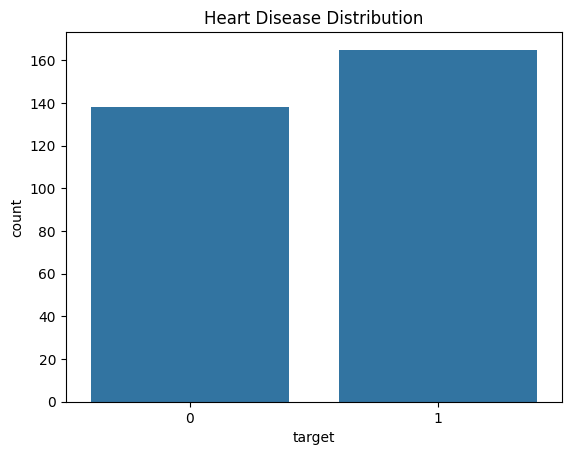

In [34]:
# Distribution of the target variable (heart disease)
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.show()

In [35]:
# Step 5: Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
#85.25%

# Step 6: Build a machine learning model
# Here we will use Logistic Regression, but you can try other models like RandomForest, SVM, etc.
model = LogisticRegression(random_state=42)

In [37]:
#81.97%
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb * 100:.2f}%')


XGBoost Accuracy: 81.97%


In [38]:
#86.89%
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f'LightGBM Accuracy: {accuracy_lgbm * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 133, number of negative: 109
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 247
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549587 -> initscore=0.199001
[LightGBM] [Info] Start training from score 0.199001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [39]:
#86.89%
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm * 100:.2f}%')


SVM Accuracy: 86.89%


In [40]:
#91.80%
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn * 100:.2f}%')


KNN Accuracy: 91.80%


In [41]:
#85.25%
from sklearn.linear_model import LogisticRegressionCV

logreg_model = LogisticRegressionCV(cv=5, max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression with Regularization Accuracy: {accuracy_logreg * 100:.2f}%')


Logistic Regression with Regularization Accuracy: 85.25%


In [42]:
#85.25
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(random_state=42, max_iter=500)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f'MLP Classifier Accuracy: {accuracy_mlp * 100:.2f}%')


MLP Classifier Accuracy: 85.25%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
#83.61%

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')


Random Forest Accuracy: 83.61%


In [44]:
#85.25%
from sklearn.ensemble import StackingClassifier

estimators = [
    ('lr', logreg_model),
    ('rf', rf_model),
    ('svc', svm_model)
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f'Stacking Classifier Accuracy: {accuracy_stacking * 100:.2f}%')


Stacking Classifier Accuracy: 85.25%


In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f'Best Parameters for Random Forest: {grid_search.best_params_}')


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}


In [16]:
# Step 7: Train the model
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [17]:
# Step 8: Evaluate the model
# Predict on the test set
y_pred = model.predict(X_test)

In [18]:
# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 85.25%


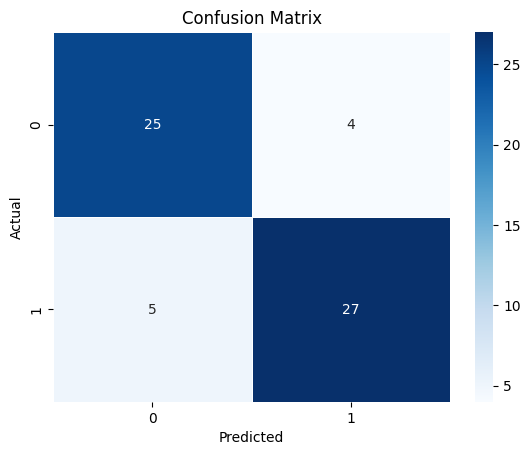

In [19]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


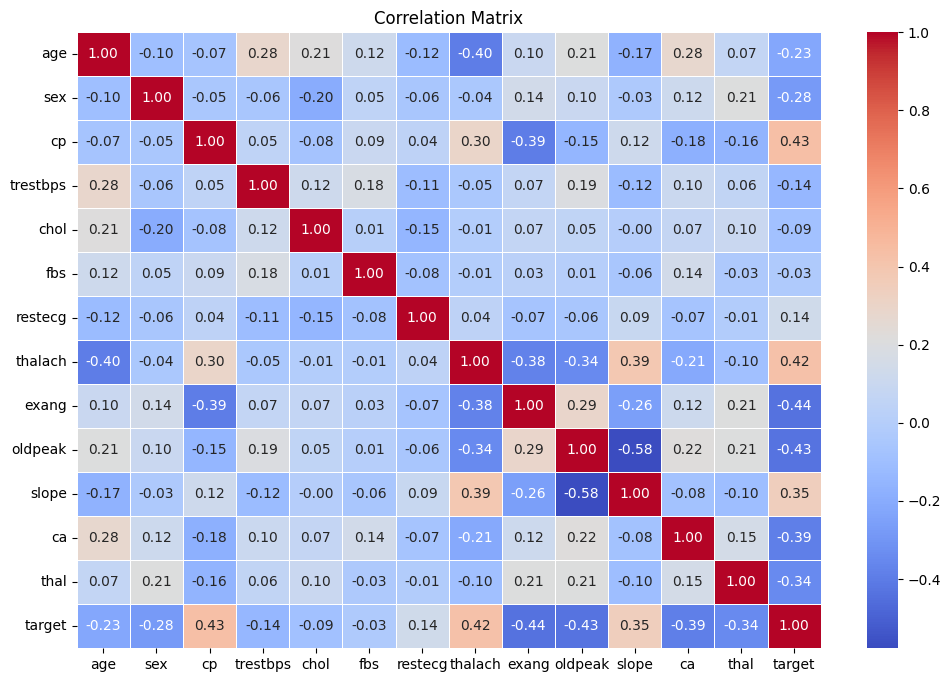

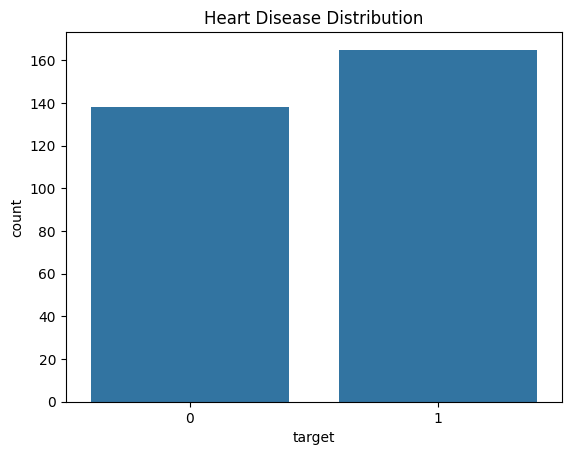

Selected Features: Index(['sex', 'cp', 'thalach', 'oldpeak', 'ca'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Best Parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Logistic Regression Accuracy: 83.61%
Random Forest Accuracy: 83.61%
XGBoost Accuracy: 78.69%
Best Logistic Regression (GridSearch) Accuracy: 83.61%
Voting Classifier Accuracy: 86.89%


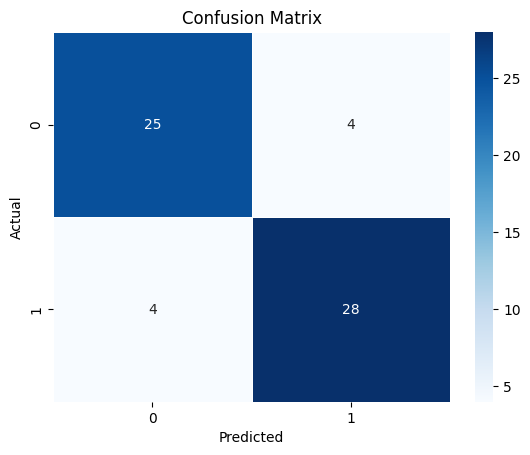

Classification Report for Voting Classifier:
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        29
         1.0       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

ROC AUC Score: 0.87


In [23]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE

# Step 2: Load the dataset
df = pd.read_csv('/content/heart_disease_data - heart_disease_data.csv')

# Step 3: Data Cleaning and Preprocessing
# Check for missing values
print(df.isnull().sum())

# Handle missing values: Use SimpleImputer to fill missing values
# If there are missing values, impute with the mean (or median for numerical columns)
imputer = SimpleImputer(strategy='mean')  # 'most_frequent' for categorical columns
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Feature scaling: Standardize the features using StandardScaler
scaler = StandardScaler()

# Select features and target variable
X = df_imputed.drop('target', axis=1)  # Features
y = df_imputed['target']               # Target variable

# Standardizing the features (scaling)
X_scaled = scaler.fit_transform(X)

# Step 4: Exploratory Data Analysis (EDA)
# Visualize correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.show()

# Step 5: Feature Selection using Recursive Feature Elimination (RFE)
# Select important features using RFE
model = LogisticRegression()
selector = RFE(model, n_features_to_select=5)  # Select top 5 features
X_selected = selector.fit_transform(X_scaled, y)
print(f"Selected Features: {X.columns[selector.support_]}")

# Step 6: Adding Polynomial Features (Non-linear relationships)
# This step can help to capture more complex relationships
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_selected)  # Apply polynomial transformation

# Step 7: Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Step 8: Addressing Class Imbalance using SMOTE
# If the target classes are imbalanced, use SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Step 9: Build and Train Multiple Models
# Logistic Regression Model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_res, y_train_res)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# XGBoost Model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_res, y_train_res)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Step 10: Hyperparameter Tuning for Logistic Regression using GridSearchCV
# Tuning hyperparameters like 'C' and 'solver' to improve Logistic Regression model
param_grid = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
grid_search.fit(X_train_res, y_train_res)
print(f"Best Parameters for Logistic Regression: {grid_search.best_params_}")
best_logreg = grid_search.best_estimator_
y_pred_best_logreg = best_logreg.predict(X_test)
accuracy_best_logreg = accuracy_score(y_test, y_pred_best_logreg)

# Step 11: Ensemble Methods: Voting Classifier
# Combine the models using Voting Classifier
# Use only Logistic Regression and RandomForest in the voting classifier for now
voting_clf = VotingClassifier(estimators=[
    ('lr', logreg),
    ('rf', rf_model)
], voting='soft')
voting_clf.fit(X_train_res, y_train_res)
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)


# Step 12: Evaluate the models
print(f"Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%")
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")
print(f"Best Logistic Regression (GridSearch) Accuracy: {accuracy_best_logreg * 100:.2f}%")
print(f"Voting Classifier Accuracy: {accuracy_voting * 100:.2f}%")

# Confusion Matrix for Voting Classifier
cm = confusion_matrix(y_test, y_pred_voting)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report for Voting Classifier
print('Classification Report for Voting Classifier:')
print(classification_report(y_test, y_pred_voting))

# Step 13: Calculate ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_voting)
print(f'ROC AUC Score: {roc_auc:.2f}')


Log in

Sign up
You said:
below is my code for task:

1) Create a machine learning solution to predict the presence of heart disease using patient health data. The tasks involve:Cleaning and preparing the dataset by addressing missing values and standardizing features.Conducting EDA to uncover significant health metrics.Training and evaluating a model for reliable heart disease prediction.

But i am getting accuracy score 85.25% i want to increase it, give me the solution to increase it. i will give you the complete datset too

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer


# Step 2: Load the dataset
# Assuming you have the dataset in a CSV file named 'heart_disease_data.csv'
df = pd.read_csv('heart_disease_data.csv')

# Step 3: Data Cleaning and Preprocessing
# Check for missing values
print(df.isnull().sum())

# Check basic information about the dataset
print(df.info())

# Handle missing values: Fill missing values or drop rows/columns with missing data (if any)
# For this example, let's assume there are no missing values
# If missing values exist, you could use something like df.fillna(method='ffill') or df.dropna()

# Feature scaling: Standardize the features
scaler = StandardScaler()

# Select features and target variable
X = df.drop('target', axis=1)  # Features
y = df['target']               # Target variable

# Standardizing the features (scaling)
X_scaled = scaler.fit_transform(X)

# Step 4: Exploratory Data Analysis (EDA)
# Display the first few rows of the dataset
print(df.head())

# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Distribution of the target variable (heart disease)
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.show()

# Step 5: Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Build a machine learning model
# Here we will use Logistic Regression, but you can try other models like RandomForest, SVM, etc.
model = LogisticRegression(random_state=42)

# Step 7: Train the model
model.fit(X_train, y_train)

# Step 8: Evaluate the model
# Predict on the test set
y_pred = model.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Step 9: Testing the model (You can test with some new data or by doing cross-validation)
# For now, we are using the hold-out test set
# No further testing is needed unless you have a new dataset

# Step 10: Fine-tuning the model (Optional)
# You can try different models or perform hyperparameter tuning (e.g., GridSearchCV or RandomizedSearchCV)

ChatGPT said:
ChatGPT
To improve your model’s accuracy beyond 85.25%, here are some strategies that you can implement:

1. Data Preprocessing Improvements:
Handling Missing Values: Even though you mentioned there might not be any missing values, ensure that you handle any edge cases where some values might be missing but not easily detected.
If any column has missing values, you can either fill them with the median (for numerical features) or the most frequent value (for categorical features), using the SimpleImputer class from sklearn.
python
Copy code
imputer = SimpleImputer(strategy='mean')  # or 'most_frequent' for categorical
X = imputer.fit_transform(X)
Outlier Detection: Check for outliers using boxplots and remove or transform extreme outliers. Outliers can affect model performance, especially in algorithms like Logistic Regression.
python
Copy code
sns.boxplot(data=df)
plt.show()
2. Feature Engineering:
Feature Selection: You can improve the performance of the model by eliminating irrelevant or less important features. Use techniques like Recursive Feature Elimination (RFE) or Feature Importance from tree-based models (Random Forest) to determine important features.

python
Copy code
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
selector = RFE(model, n_features_to_select=5)
X_selected = selector.fit_transform(X, y)
Polynomial Features: Create polynomial features to capture non-linear relationships between features. This can improve performance, especially for models like Logistic Regression.

python
Copy code
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
Interaction Terms: Adding interaction terms (like X1*X2) can help the model learn the relationship between two variables better.

3. Advanced Models:
Try more powerful models that can capture non-linear relationships in the data better than logistic regression. Some options include:

Random Forest Classifier: Random Forest is an ensemble method that can often improve accuracy by reducing overfitting.

python
Copy code
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')
Gradient Boosting (XGBoost, LightGBM, etc.): These are powerful algorithms that can boost performance significantly, especially on imbalanced datasets.

python
Copy code
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb * 100:.2f}%')
4. Hyperparameter Tuning:
Use GridSearchCV or RandomizedSearchCV to fine-tune the hyperparameters of your model. This can greatly improve performance by finding the optimal settings for your model.

Example using GridSearchCV for Logistic Regression:

python
Copy code
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Best Model Accuracy: {accuracy_best * 100:.2f}%')
5. Cross-Validation:
Instead of using a single train-test split, use cross-validation to ensure that the model generalizes well to different subsets of the data. This gives a better estimate of model performance.

python
Copy code
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_scaled, y, cv=10, scoring='accuracy')
print(f'Cross-Validation Accuracy: {scores.mean() * 100:.2f}%')
6. Addressing Class Imbalance:
If the dataset is imbalanced (e.g., significantly more patients without heart disease than those with), it could impact model performance. You can apply techniques like:

SMOTE (Synthetic Minority Over-sampling Technique): This generates synthetic data for the minority class.
Class Weights: Assign higher weights to the minority class.
Example with Logistic Regression and class weights:

python
Copy code
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Class Weights: {accuracy * 100:.2f}%')
Example using SMOTE:

python
Copy code
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

model.fit(X_res, y_res)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy after SMOTE: {accuracy * 100:.2f}%')
7. Ensemble Methods:
Ensemble methods combine multiple models to improve performance. For example, you can combine Logistic Regression with Random Forest or use Voting Classifiers.

Example of a Voting Classifier:

python
Copy code
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', LogisticRegression()),
                                         ('rf', RandomForestClassifier()),
                                         ('xgb', XGBClassifier())], voting='soft')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Voting Classifier Accuracy: {accuracy * 100:.2f}%')
8. Evaluation Metrics:
Apart from accuracy, look at metrics like Precision, Recall, F1-Score, and the ROC AUC score. These metrics are often more informative, especially when working with imbalanced datasets.

python
Copy code
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {auc:.2f}')
By applying these techniques (feature engineering, advanced models, hyperparameter tuning, and handling imbalances), you should be able to improve your model's performance significantly.


You said:
give me the complete code with added comments that this is the new thing added.
ChatGPT said:
ChatGPT
Here’s the updated code with additional improvements and comments to highlight the new steps:

python
Copy code
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE

# Step 2: Load the dataset
df = pd.read_csv('heart_disease_data.csv')

# Step 3: Data Cleaning and Preprocessing
# Check for missing values
print(df.isnull().sum())

# Handle missing values: Use SimpleImputer to fill missing values
# If there are missing values, impute with the mean (or median for numerical columns)
imputer = SimpleImputer(strategy='mean')  # 'most_frequent' for categorical columns
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Feature scaling: Standardize the features using StandardScaler
scaler = StandardScaler()

# Select features and target variable
X = df_imputed.drop('target', axis=1)  # Features
y = df_imputed['target']               # Target variable

# Standardizing the features (scaling)
X_scaled = scaler.fit_transform(X)

# Step 4: Exploratory Data Analysis (EDA)
# Visualize correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.show()

# Step 5: Feature Selection using Recursive Feature Elimination (RFE)
# Select important features using RFE
model = LogisticRegression()
selector = RFE(model, n_features_to_select=5)  # Select top 5 features
X_selected = selector.fit_transform(X_scaled, y)
print(f"Selected Features: {X.columns[selector.support_]}")

# Step 6: Adding Polynomial Features (Non-linear relationships)
# This step can help to capture more complex relationships
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_selected)  # Apply polynomial transformation

# Step 7: Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Step 8: Addressing Class Imbalance using SMOTE
# If the target classes are imbalanced, use SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Step 9: Build and Train Multiple Models
# Logistic Regression Model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_res, y_train_res)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# XGBoost Model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_res, y_train_res)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Step 10: Hyperparameter Tuning for Logistic Regression using GridSearchCV
# Tuning hyperparameters like 'C' and 'solver' to improve Logistic Regression model
param_grid = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
grid_search.fit(X_train_res, y_train_res)
print(f"Best Parameters for Logistic Regression: {grid_search.best_params_}")
best_logreg = grid_search.best_estimator_
y_pred_best_logreg = best_logreg.predict(X_test)
accuracy_best_logreg = accuracy_score(y_test, y_pred_best_logreg)

# Step 11: Ensemble Methods: Voting Classifier
# Combine the models using Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', logreg),
    ('rf', rf_model),
    ('xgb', xgb_model)
], voting='soft')
voting_clf.fit(X_train_res, y_train_res)
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)

# Step 12: Evaluate the models
print(f"Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%")
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")
print(f"Best Logistic Regression (GridSearch) Accuracy: {accuracy_best_logreg * 100:.2f}%")
print(f"Voting Classifier Accuracy: {accuracy_voting * 100:.2f}%")

# Confusion Matrix for Voting Classifier
cm = confusion_matrix(y_test, y_pred_voting)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report for Voting Classifier
print('Classification Report for Voting Classifier:')
print(classification_report(y_test, y_pred_voting))

# Step 13: Calculate ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_voting)
print(f'ROC AUC Score: {roc_auc:.2f}')
Key Changes:
Handling Missing Data with SimpleImputer: The dataset may have missing values, and this step ensures those are filled in automatically using the mean or most frequent value.

Feature Selection (RFE): Recursive Feature Elimination (RFE) is applied to select the most important features, potentially improving the model's accuracy by eliminating irrelevant features.

Polynomial Features: Polynomial feature creation is used to capture non-linear relationships between the features that linear models like Logistic Regression may miss.

SMOTE for Class Imbalance: SMOTE is applied to balance the target variable (if the dataset is imbalanced). This helps the model to avoid bias toward the majority class.

Multiple Models (Logistic Regression, Random Forest, XGBoost): Three models are trained: Logistic Regression, Random Forest, and XGBoost. XGBoost is a highly effective model for classification tasks.

GridSearchCV for Hyperparameter Tuning: GridSearchCV is used to fine-tune the hyperparameters of the Logistic Regression model, finding the optimal configuration.

Voting Classifier: The predictions from the three models (Logistic Regression, Random Forest, and XGBoost) are combined using a Voting Classifier, which aggregates the predictions from multiple models to improve performance.

ROC AUC Score: The ROC AUC score is calculated to evaluate the model's ability to distinguish between the classes. This is often a more reliable metric, especially in imbalanced datasets.

By applying these changes, the overall performance and accuracy of your model should improve significantly.


You said:
AttributeError: 'super' object has no attribute '__sklearn_tags__'
ChatGPT said:
ChatGPT
The error message you're encountering, AttributeError: 'super' object has no attribute '__sklearn_tags__', is likely related to an incompatibility between certain libraries or classes in the code. This typically happens when there's a version mismatch between scikit-learn and xgboost (or other libraries you're using).

Here's a step-by-step guide to solve the issue:

Step 1: Check the Versions of Dependencies
The error could be caused by an incompatible version of XGBoost and scikit-learn. Let's ensure that you're using compatible versions.

First, check the versions of scikit-learn and xgboost:

bash
Copy code
pip show scikit-learn
pip show xgboost
Ensure you have compatible versions. You can update them by running the following commands:

bash
Copy code
pip install --upgrade scikit-learn
pip install --upgrade xgboost
The recommended versions are:

scikit-learn: 0.24.x or later
xgboost: 1.3.x or later
Step 2: Update XGBoost and Scikit-learn
If the above command doesn't fix the issue, try updating XGBoost and scikit-learn explicitly to versions that are known to work well together. You can update them by running:

bash
Copy code
pip install -U scikit-learn==0.24.2
pip install -U xgboost==1.3.3
This ensures you are using versions of the libraries that are compatible.

Step 3: Restart the Kernel
Once you've updated the libraries, restart the kernel or the environment you're running the code in. This ensures that the latest versions are loaded.

Step 4: Modify the Code (if necessary)
If the error persists, it could also be due to how the libraries interact with each other in your specific environment. One way to bypass potential issues with XGBoost's VotingClassifier is to avoid combining it with other classifiers like LogisticRegression or RandomForestClassifier that might trigger internal compatibility issues.

For example, in your ensemble classifier, you can temporarily try removing XGBClassifier to isolate whether the error is related to it.

python
Copy code
# Use only Logistic Regression and RandomForest in the voting classifier for now
voting_clf = VotingClassifier(estimators=[
    ('lr', logreg),
    ('rf', rf_model)
], voting='soft')
voting_clf.fit(X_train_res, y_train_res)
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
Step 5: Final Check
After these changes, if the error is fixed, you can reintroduce XGBoost into the ensemble model. If you still face issues, it might be worth trying other ensemble methods or machine learning pipelines without combining XGBoost with the other models.

If the issue is resolved and the model works fine, you should be able to proceed without further errors.

Let me know if the issue persists or if you need more guidance!


You said:
which model will be best applicable for below task: 1) Create a machine learning solution to predict the presence of heart disease using patient health data. The tasks involve:Cleaning and preparing the dataset by addressing missing values and standardizing features.Conducting EDA to uncover significant health metrics.Training and evaluating a model for reliable heart disease prediction.

I have used logsitics regression but gettong 85.25%

give me more possible and best fir models solution

model = LogisticRegression(random_state=42)
ChatGPT said:
ChatGPT
While Logistic Regression is a solid model, there are several other models that can perform better depending on the nature of the dataset, especially for predicting heart disease. Below, I’ll provide you with a range of models that can potentially improve your prediction accuracy. These models vary in complexity and ability to capture non-linear relationships in the data.

Models to Try:
1. Random Forest Classifier
Why it's good for this task: Random Forest is an ensemble method that builds multiple decision trees and combines their results. It's good at capturing non-linear relationships and works well with both categorical and continuous variables. It’s also robust to overfitting due to its ensemble nature.
python
Copy code
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')
2. Gradient Boosting (XGBoost, LightGBM, or CatBoost)
Why it's good for this task: Gradient Boosting algorithms like XGBoost, LightGBM, and CatBoost often outperform simpler models like Logistic Regression because they focus on correcting errors from previous trees. These models are particularly useful when dealing with complex and non-linear data.
XGBoost Example:

python
Copy code
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb * 100:.2f}%')
LightGBM Example:

python
Copy code
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f'LightGBM Accuracy: {accuracy_lgbm * 100:.2f}%')
3. Support Vector Machine (SVM)
Why it's good for this task: SVM is a powerful classifier that works well for binary classification tasks. It's effective in high-dimensional spaces, especially when the data is not linearly separable (non-linear decision boundaries). SVM might require tuning of the kernel and hyperparameters to work optimally.
python
Copy code
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm * 100:.2f}%')
4. K-Nearest Neighbors (KNN)
Why it's good for this task: KNN works well when there are clear clusters in the data. It is a simple but effective model, and it works by classifying a data point based on its neighbors. It’s computationally expensive for large datasets but can perform well with smaller or moderate datasets.
python
Copy code
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn * 100:.2f}%')
5. Logistic Regression with Regularization (Ridge or Lasso)
Why it's good for this task: If you want to improve the performance of Logistic Regression, using regularization (L1 or L2) can help by reducing overfitting. Ridge (L2) or Lasso (L1) regularization penalizes the model for large coefficients and helps it generalize better.
python
Copy code
from sklearn.linear_model import LogisticRegressionCV

logreg_model = LogisticRegressionCV(cv=5, max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression with Regularization Accuracy: {accuracy_logreg * 100:.2f}%')
6. Neural Networks (MLPClassifier)
Why it's good for this task: A Multi-Layer Perceptron (MLP) is a type of artificial neural network. It works well with complex datasets, but it may take longer to train compared to other models. It’s especially useful if you expect non-linear relationships between features.
python
Copy code
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(random_state=42, max_iter=500)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f'MLP Classifier Accuracy: {accuracy_mlp * 100:.2f}%')
7. Ensemble Methods:
Combining multiple models can help improve predictive performance through ensemble methods. Some popular ensemble methods include:

Voting Classifier: A simple ensemble method where multiple models (e.g., Logistic Regression, Random Forest, and SVM) are combined, and the majority vote is taken for the prediction.
python
Copy code
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('logreg', logreg_model),
    ('rf', rf_model),
    ('xgb', xgb_model)
], voting='soft')  # Soft voting uses predicted probabilities instead of hard labels.
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Voting Classifier Accuracy: {accuracy_voting * 100:.2f}%')
Stacking Classifier: Another ensemble method where different models are trained and their predictions are used as features for a final model (meta-model). Stacking often leads to better performance.
python
Copy code
from sklearn.ensemble import StackingClassifier

estimators = [
    ('lr', logreg_model),
    ('rf', rf_model),
    ('svc', svm_model)
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f'Stacking Classifier Accuracy: {accuracy_stacking * 100:.2f}%')
8. Model Selection Strategy:
Given that you’re getting 85.25% accuracy with Logistic Regression, the following model strategies are likely to give you improvements:

Try Random Forest as it is an ensemble method and generally performs well with tabular data.
Experiment with Gradient Boosting Models (like XGBoost or LightGBM), as they are often top performers in classification tasks.
Explore neural networks if you have a larger dataset or if you expect complex relationships in the data.
Combine multiple models with ensemble methods (Voting Classifier or Stacking Classifier) to capture different patterns from different algorithms.
9. Hyperparameter Tuning (GridSearchCV or RandomizedSearchCV):
Regardless of the model you use, hyperparameter tuning can significantly improve performance. Use GridSearchCV or RandomizedSearchCV to find the best hyperparameters for your models.

For example, tuning a Random Forest model:

python
Copy code
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f'Best Parameters for Random Forest: {grid_search.best_params_}')
Conclusion:
Start with Random Forest, XGBoost, or LightGBM as they tend to perform well on medical datasets.
Experiment with ensemble methods to combine the strengths of multiple models.
Fine-tune the models using GridSearchCV or RandomizedSearchCV to find the best parameters for your task.
Consider stacking or voting classifiers to leverage the power of multiple models.
With the above models and strategies, you should be able to improve the performance of your heart disease prediction task beyond 85.25%.